In [1]:
import pandas as pd

In [3]:
df_108=pd.read_csv("./Dataset_20240601-20250428/01Jul2024-28Avr2025_Salle_108.csv")

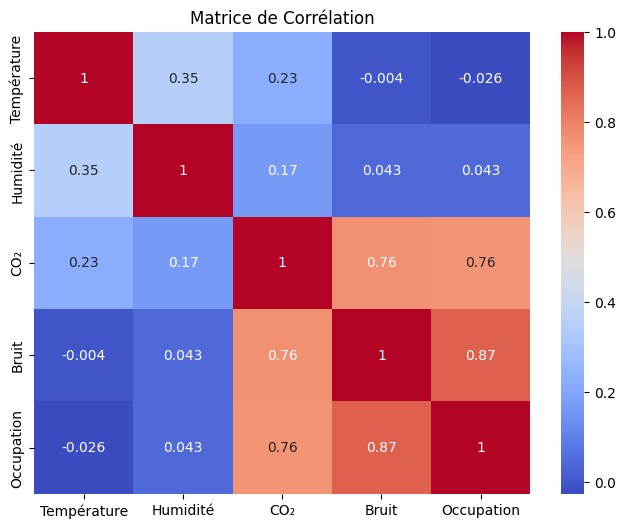

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_originales = ['NOVOS3_7_Temperature_u6_108', 'THERMOKON_15DF_Humidity_u6_108', 'NOVOS3_7_Co2_u6_108', 'DUTCHSS_1F6E_Noise_u6_108', 'THERMOKON_15DF_OccupancyBinaire_u6_108']

noms_affiches = ['Température', 'Humidité', 'CO₂', 'Bruit', 'Occupation']

df1=df_108.dropna()
matrice_corr = df1[colonnes_originales].corr()

# Création de la heatmap avec noms personnalisés
plt.figure(figsize=(8,6))
sns.heatmap(
    matrice_corr,
    annot=True,
    cmap='coolwarm',
    xticklabels=noms_affiches,
    yticklabels=noms_affiches
)
plt.title("Matrice de Corrélation")
plt.show()


In [85]:
Occ = df_108[['Timestamp', 'THERMOKON_15DF_OccupancyBinaire_u6_108']]
Occ['Timestamp'] = pd.to_datetime(Occ['Timestamp'])
n_days = len(Occ) // 144
Occ_clean = Occ.iloc[:n_days * 144]
dates = Occ_clean['Timestamp'].dt.date[::144].reset_index(drop=True)
reshaped = Occ_clean['THERMOKON_15DF_OccupancyBinaire_u6_108'].to_numpy().reshape(n_days, 144)
df_Occ = pd.DataFrame(reshaped)
df_Occ['Date'] = dates  
df_Occ = df_Occ.set_index('Date')

jours_occupes = df_Occ.iloc[:, 1:].sum(axis=1) != 0
df_Occ_filtré = df_Occ[jours_occupes]
valeurs_flat = df_Occ_filtré.values
occupation_flat = valeurs_flat.flatten()
dates_dupliquees = df_Occ_filtré.index.repeat(144)
df_occupation_finale = pd.DataFrame({
    'Date': dates_dupliquees,
    'Occupation': occupation_flat
})


C:\Users\toubia\AppData\Local\Temp\ipykernel_12320\3769062929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Occ['Timestamp'] = pd.to_datetime(Occ['Timestamp'])


In [88]:
# Colonnes de capteurs
colonnes_capteurs = ['NOVOS3_7_Temperature_u6_108',
                     'THERMOKON_15DF_Humidity_u6_108',
                     'NOVOS3_7_Co2_u6_108',
                     'DUTCHSS_1F6E_Noise_u6_108']

# On filtre et reshape chaque colonne comme pour l'occupation
dfs_aplatis = []

for col in colonnes_capteurs:
    # On repart de la colonne + timestamp
    capteur_df = df_108[['Timestamp', col]].copy()
    capteur_df['Timestamp'] = pd.to_datetime(capteur_df['Timestamp'])

    # Découpage sur n_days
    capteur_clean = capteur_df.iloc[:n_days * 144]
    reshaped = capteur_clean[col].to_numpy().reshape(n_days, 144)

    # On en fait un DataFrame avec les mêmes dates
    df_capteur = pd.DataFrame(reshaped)
    df_capteur['Date'] = dates
    df_capteur = df_capteur.set_index('Date')

    # On garde uniquement les jours occupés
    df_capteur_filtré = df_capteur[jours_occupes]

    # Flatten
    valeurs_flat = df_capteur_filtré.values.flatten()

    # Ajouter dans une liste
    dfs_aplatis.append(valeurs_flat)

# Construire le DataFrame final en les combinant
df_autres_valeurs = pd.DataFrame({
    'Température': dfs_aplatis[0],
    'Humidité': dfs_aplatis[1],
    'CO₂': dfs_aplatis[2],
    'Bruit': dfs_aplatis[3]
})

# Concaténer avec df_occupation_finale
df_complet = pd.concat([df_occupation_finale.reset_index(drop=True),
                        df_autres_valeurs], axis=1)


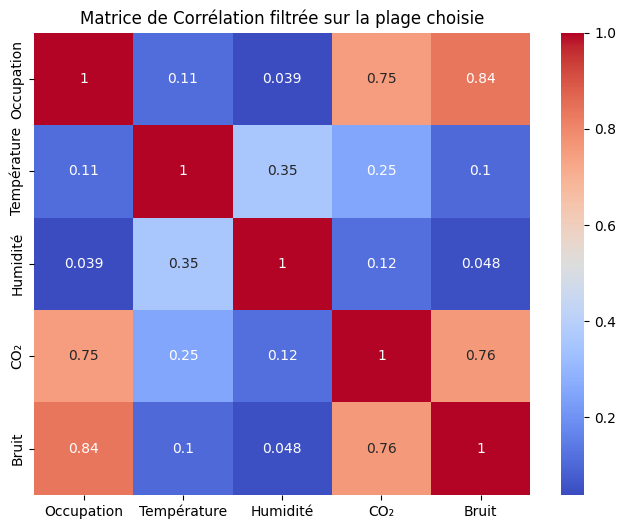

In [92]:
matrice_corr = df_complet.iloc[:,1:].corr()

# Afficher la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    matrice_corr,
    annot=True,
    cmap='coolwarm',
)
plt.title("Matrice de Corrélation filtrée sur la plage choisie")
plt.show()


In [4]:
temp = df_108[['NOVOS3_7_Temperature_u6_108']]
n_days = len(temp) // 144
temp_clean = temp.iloc[:n_days * 144]  # on coupe les valeurs en trop
reshaped = temp_clean.to_numpy().reshape(n_days, 144)
df_temp = pd.DataFrame(reshaped)


Hum = df_108[['THERMOKON_15DF_Humidity_u6_108']]
n_days = len(Hum) // 144
Hum_clean = Hum.iloc[:n_days * 144]  # on coupe les valeurs en trop
reshaped = Hum_clean.to_numpy().reshape(n_days, 144)
df_hum = pd.DataFrame(reshaped)

Co2 = df_108[['NOVOS3_7_Co2_u6_108']]
n_days = len(Co2) // 144
Co2_clean = Co2.iloc[:n_days * 144]  # on coupe les valeurs en trop
reshaped = Co2_clean.to_numpy().reshape(n_days, 144)
df_co2 = pd.DataFrame(reshaped)

Noise = df_108[['DUTCHSS_1F6E_Noise_u6_108']]
n_days = len(Noise) // 144
Noise_clean = Noise.iloc[:n_days * 144]  # on coupe les valeurs en trop
reshaped = Noise_clean.to_numpy().reshape(n_days, 144)
df_Noise = pd.DataFrame(reshaped)

Occ = df_108[['THERMOKON_15DF_OccupancyBinaire_u6_108']]
n_days = len(Occ) // 144
Occ_clean = Occ.iloc[:n_days * 144]  # on coupe les valeurs en trop
reshaped = Occ_clean.to_numpy().reshape(n_days, 144)
df_Occ = pd.DataFrame(reshaped)

In [5]:
df_co2.isna().sum().sum()

1248

In [6]:
((df_Occ.sum(axis=1))!=0).sum()

152

In [20]:
len(df_Noise)

300

In [21]:
for df in [df_temp, df_hum, df_co2, df_Noise]:
    df.interpolate(method='linear', axis=1, limit_direction='both', inplace=True)
    df.ffill(axis=1, inplace=True)
    df.bfill(axis=1, inplace=True)
    
for df in [df_temp, df_hum, df_co2, df_Noise]:
    df.dropna(how='all', inplace=True)


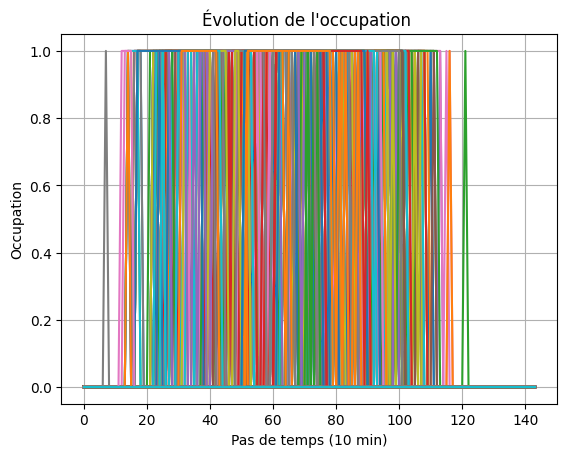

In [143]:
import matplotlib.pyplot as plt
for i in range(df_Occ.shape[0]):
    plt.plot(range(144), df_Occ.iloc[i])  # tracer la 1ère journée
plt.title("Évolution de l'occupation ")
plt.xlabel("Pas de temps (10 min)")
plt.ylabel("Occupation")
plt.grid(True)
plt.show()


In [15]:
df_Occ=df_Occ.dropna()

In [47]:
df_Occ.isna().sum().sum()

0

In [50]:
df_hum.shape

(256, 144)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

def train_lstm_model(X, Y, input_shape, test_size=0.2, epochs=20, batch_size=16, threshold=0.5):
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=42, shuffle=True
    )

    # Modèle
    model = Sequential([
        LSTM(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        TimeDistributed(Dense(1, activation='sigmoid'))
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entraînement
    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, Y_test),
        verbose=1
    )

    # Prédictions sur le test set
    Y_pred = model.predict(X_test)

    # Optionnel : appliquer le seuil si tu veux des prédictions binaires
    Y_pred_binary = (Y_pred > threshold).astype(int)

    # Retourner les vraies valeurs, prédictions, et X_test pour visualisation
    return X_test, Y_test, Y_pred, Y_pred_binary, history


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)

df_combined = pd.concat([df_temp_norm, df_Occ2], axis=1, join='inner')

X = df_combined.iloc[:, :144].to_numpy().reshape((-1, 144, 1))

Y = df_combined.iloc[:, -144:].to_numpy()

X_test, Y_test, Y_pred, Y_pred_binary, history = train_lstm_model(
    X,
    Y,
    input_shape=(144, 1),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)



Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.6041 - loss: 0.6649 - val_accuracy: 0.8451 - val_loss: 0.5011
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8324 - loss: 0.4933 - val_accuracy: 0.8451 - val_loss: 0.4729
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8576 - loss: 0.4462 - val_accuracy: 0.8451 - val_loss: 0.4636
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8489 - loss: 0.4527 - val_accuracy: 0.8451 - val_loss: 0.4583
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8235 - loss: 0.4911 - val_accuracy: 0.8451 - val_loss: 0.4547
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8430 - loss: 0.4545 - val_accuracy: 0.8451 - val_loss: 0.4494
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8486 - loss: 0.4412 - val_accuracy: 0.8451 - val_loss: 0.4444
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8385 - loss: 0.4524 - val_accuracy: 0.8451 - val

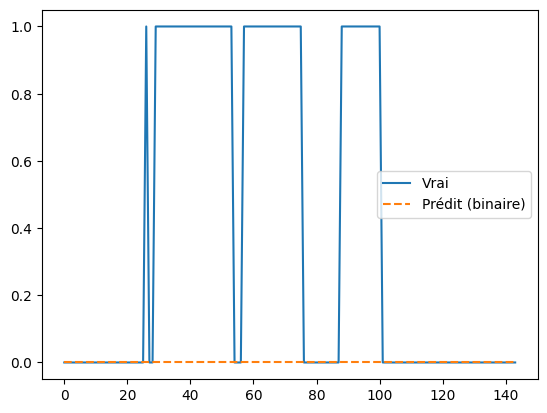

In [109]:


plt.plot(Y_test[3].flatten(), label='Vrai')
plt.plot(Y_pred_binary[3].flatten(), label='Prédit (binaire)', linestyle='--')
plt.legend()
plt.show()


In [13]:
df_filtered.isna().sum().sum()

473

In [25]:
sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]

X = df_filtered.iloc[:, :144].to_numpy().reshape((-1, 144, 1))
Y = df_filtered.iloc[:, -144:].to_numpy()

X_test2, Y_test2, Y_pred2, Y_pred_binary2, history2 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 1),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)



Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.4357 - loss: 0.6995 - val_accuracy: 0.7180 - val_loss: 0.6568
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7014 - loss: 0.6526 - val_accuracy: 0.7180 - val_loss: 0.6231
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7051 - loss: 0.6316 - val_accuracy: 0.7180 - val_loss: 0.6204
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6900 - loss: 0.6382 - val_accuracy: 0.7180 - val_loss: 0.6208
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6822 - loss: 0.6409 - val_accuracy: 0.7180 - val_loss: 0.6189
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6996 - loss: 0.6280 - val_accuracy: 0.7180 - val_loss: 0.6144
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6848 - loss: 0.6371 - val_accuracy: 0.7180 - val_loss: 0.6127
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6888 - loss: 0.6328 - val_accuracy: 0.7180 - val_loss: 0.6118
Ep

In [27]:


plt.plot(Y_test2[16].flatten(), label='Vrai')
plt.plot(Y_pred_binary2[16].flatten(), label='Prédit (binaire)', linestyle='--')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [28]:
len(df_filtered)

151

In [30]:
import numpy as np

In [31]:
scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
df_Noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)

df_combined = pd.concat([df_temp_norm,df_Noise_norm, df_Occ], axis=1, join='inner')

temp = df_combined.iloc[:, 0:144].to_numpy()      
noise = df_combined.iloc[:, 144:288].to_numpy()  
X = np.stack((temp, noise), axis=2)  

Y = df_combined.iloc[:, -144:].to_numpy()

X_test3, Y_test3, Y_pred3, Y_pred_binary3, history3 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 2),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 211ms/step - accuracy: 0.8659 - loss: 0.6481 - val_accuracy: 0.8468 - val_loss: 0.4892
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8702 - loss: 0.4398 - val_accuracy: 0.8468 - val_loss: 0.4472
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8782 - loss: 0.3828 - val_accuracy: 0.8468 - val_loss: 0.4086
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8625 - loss: 0.3865 - val_accuracy: 0.8468 - val_loss: 0.3566
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8690 - loss: 0.3234 - val_accuracy: 0.8647 - val_loss: 0.3042
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8704 - loss: 0.3047 - val_accuracy: 0.8739 - val_loss: 0.2863
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8825 - loss: 0.2793 - val_accuracy: 0.8876 - val_loss: 0.2683
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8921 - loss: 0.2586 - val_accuracy: 0.8951 - val

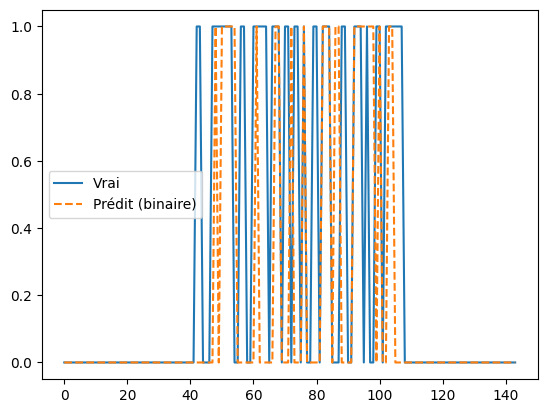

In [73]:
plt.plot(Y_test[8].flatten(), label='Vrai')
plt.plot(Y_pred_binary[8].flatten(), label='Prédit (binaire)', linestyle='--')
plt.legend()
plt.show()


In [33]:
scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
df_Noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)

df_combined = pd.concat([df_temp_norm,df_Noise_norm, df_Occ], axis=1, join='inner')
sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]

temp = df_filtered.iloc[:, 0:144].to_numpy()      
noise = df_filtered.iloc[:, 144:288].to_numpy()  
X = np.stack((temp, noise), axis=2)  

Y = df_filtered.iloc[:, -144:].to_numpy()

X_test4, Y_test4, Y_pred4, Y_pred_binary4, history4 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 2),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.8540 - loss: 0.6675 - val_accuracy: 0.7636 - val_loss: 0.6273
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7135 - loss: 0.6238 - val_accuracy: 0.7561 - val_loss: 0.5675
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7243 - loss: 0.5697 - val_accuracy: 0.7561 - val_loss: 0.5185
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7177 - loss: 0.5375 - val_accuracy: 0.7769 - val_loss: 0.4856
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7846 - loss: 0.4859 - val_accuracy: 0.8142 - val_loss: 0.4456
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8310 - loss: 0.4350 - val_accuracy: 0.8359 - val_loss: 0.4155
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8384 - loss: 0.4166 - val_accuracy: 0.8342 - val_loss: 0.4075
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8336 - loss: 0.4040 - val_accuracy: 0.8267 - val_loss: 0.3820
E

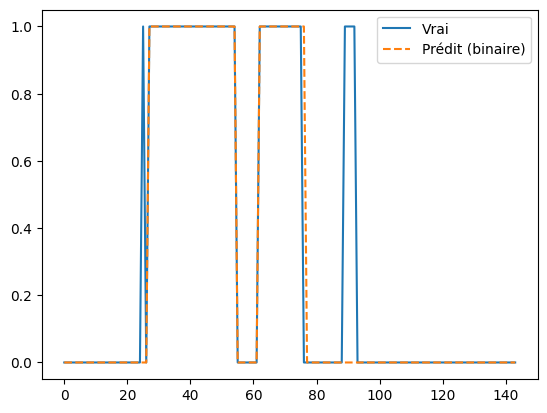

In [131]:
plt.plot(Y_test4[8].flatten(), label='Vrai')
plt.plot(Y_pred_binary4[8].flatten(), label='Prédit (binaire)', linestyle='--')
plt.legend()
plt.show()


In [128]:
scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
df_hum_norm = pd.DataFrame(scaler.fit_transform(df_hum), columns=df_hum.columns, index=df_hum.index)
df_noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)

df_combined = pd.concat([df_temp_norm,df_noise_norm,df_hum_norm ,df_Occ], axis=1, join='inner')

sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]


temp = df_filtered.iloc[:, 0:144].to_numpy()      
noise = df_filtered.iloc[:, 144:288].to_numpy() 
hum = df_filtered.iloc[:, 288:432].to_numpy()  

X = np.stack((temp, noise,hum), axis=2)  

Y = df_filtered.iloc[:, -144:].to_numpy()

X_test3, Y_test3, Y_pred3, Y_pred_binary3, history3 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 3),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 465ms/step - accuracy: 0.7251 - loss: 0.6660 - val_accuracy: 0.7561 - val_loss: 0.6159
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7174 - loss: 0.6182 - val_accuracy: 0.7561 - val_loss: 0.5591
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7252 - loss: 0.5733 - val_accuracy: 0.7561 - val_loss: 0.5237
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7201 - loss: 0.5356 - val_accuracy: 0.7815 - val_loss: 0.4942
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7941 - loss: 0.4858 - val_accuracy: 0.8252 - val_loss: 0.4653
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8249 - loss: 0.4692 - val_accuracy: 0.8058 - val_loss: 0.4325
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8198 - loss: 0.4310 - val_accuracy: 0.8252 - val_loss: 0.4243
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8325 - loss: 0.4136 - val_accuracy: 0.8180 - val_loss: 0.3913
E

In [136]:
scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
df_hum_norm = pd.DataFrame(scaler.fit_transform(df_hum), columns=df_hum.columns, index=df_hum.index)
df_noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)
df_co2_norm = pd.DataFrame(scaler.fit_transform(df_co2), columns=df_co2.columns, index=df_co2.index)

df_combined = pd.concat([df_temp_norm,df_noise_norm,df_hum_norm,df_co2_norm ,df_Occ], axis=1, join='inner')

sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]


temp = df_filtered.iloc[:, 0:144].to_numpy()      
noise = df_filtered.iloc[:, 144:288].to_numpy() 
hum = df_filtered.iloc[:, 288:432].to_numpy()  
co2 = df_filtered.iloc[:, 432:576].to_numpy() 

X = np.stack((temp, noise,hum,co2), axis=2)  

Y = df_filtered.iloc[:, -144:].to_numpy()

X_test3, Y_test3, Y_pred3, Y_pred_binary3, history3 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 4),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.6264 - loss: 0.6772 - val_accuracy: 0.7561 - val_loss: 0.6138
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7284 - loss: 0.6150 - val_accuracy: 0.7561 - val_loss: 0.5551
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7219 - loss: 0.5790 - val_accuracy: 0.7601 - val_loss: 0.5241
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7377 - loss: 0.5255 - val_accuracy: 0.7980 - val_loss: 0.4805
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8031 - loss: 0.4913 - val_accuracy: 0.8290 - val_loss: 0.4476
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8228 - loss: 0.4569 - val_accuracy: 0.8400 - val_loss: 0.4045
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8371 - loss: 0.4021 - val_accuracy: 0.8244 - val_loss: 0.3867
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8273 - loss: 0.3975 - val_accuracy: 0.8397 - val_loss: 0.3825
Ep

In [138]:
scaler = MinMaxScaler()
df_temp_norm = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns, index=df_temp.index)
df_noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)
df_co2_norm = pd.DataFrame(scaler.fit_transform(df_co2), columns=df_co2.columns, index=df_co2.index)

df_combined = pd.concat([df_temp_norm,df_noise_norm,df_co2_norm ,df_Occ], axis=1, join='inner')

sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]


temp = df_filtered.iloc[:, 0:144].to_numpy()      
noise = df_filtered.iloc[:, 144:288].to_numpy() 
co2 = df_filtered.iloc[:, 288:432].to_numpy()  

X = np.stack((temp, noise,co2), axis=2)  

Y = df_filtered.iloc[:, -144:].to_numpy()

X_test3, Y_test3, Y_pred3, Y_pred_binary3, history3 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 3),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step - accuracy: 0.6322 - loss: 0.6799 - val_accuracy: 0.7561 - val_loss: 0.6339
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7205 - loss: 0.6257 - val_accuracy: 0.7561 - val_loss: 0.5760
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7132 - loss: 0.5763 - val_accuracy: 0.7630 - val_loss: 0.5084
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7441 - loss: 0.5186 - val_accuracy: 0.8186 - val_loss: 0.4717
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8308 - loss: 0.4686 - val_accuracy: 0.8354 - val_loss: 0.4319
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8292 - loss: 0.4349 - val_accuracy: 0.8290 - val_loss: 0.3974
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8271 - loss: 0.4134 - val_accuracy: 0.8368 - val_loss: 0.3857
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8382 - loss: 0.3937 - val_accuracy: 0.8432 - val_loss: 0.3731
Ep

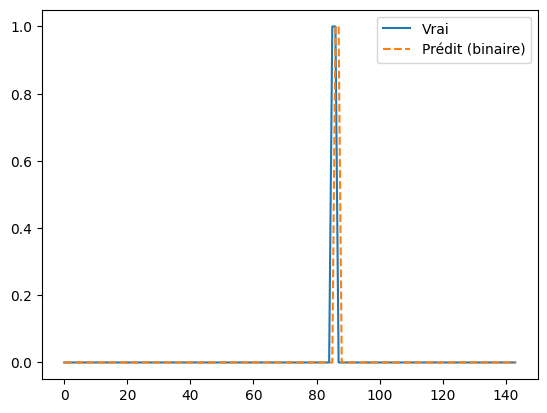

In [140]:

plt.plot(Y_test3[10].flatten(), label='Vrai')
plt.plot(Y_pred_binary3[10].flatten(), label='Prédit (binaire)', linestyle='--')
plt.legend()
plt.show()

In [72]:
scaler = MinMaxScaler()
df_noise_norm = pd.DataFrame(scaler.fit_transform(df_Noise), columns=df_Noise.columns, index=df_Noise.index)
df_co2_norm = pd.DataFrame(scaler.fit_transform(df_co2), columns=df_co2.columns, index=df_co2.index)

df_combined = pd.concat([df_noise_norm,df_co2_norm ,df_Occ], axis=1, join='inner')

sum_occupation = df_combined.iloc[:, -144:].sum(axis=1)
df_filtered = df_combined[sum_occupation != 0]


noise = df_filtered.iloc[:, 0:144].to_numpy()      
co2 = df_filtered.iloc[:, 144:288].to_numpy() 

X = np.stack((noise,co2), axis=2)  

Y = df_filtered.iloc[:, -144:].to_numpy()

X_test3, Y_test3, Y_pred3, Y_pred_binary3, history3 = train_lstm_model(
    X,
    Y,
    input_shape=(144, 2),
    epochs=100,
    batch_size=16,
    threshold=0.5 
)


Epoch 1/100


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - accuracy: 0.7215 - loss: 0.6908 - val_accuracy: 0.7561 - val_loss: 0.6655
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6997 - loss: 0.6649 - val_accuracy: 0.7595 - val_loss: 0.6263
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7320 - loss: 0.6169 - val_accuracy: 0.7561 - val_loss: 0.5406
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7236 - loss: 0.5555 - val_accuracy: 0.7821 - val_loss: 0.5113
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7922 - loss: 0.5194 - val_accuracy: 0.7969 - val_loss: 0.4833
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8090 - loss: 0.4746 - val_accuracy: 0.8302 - val_loss: 0.4490
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8333 - loss: 0.4427 - val_accuracy: 0.8273 - val_loss: 0.4063
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8404 - loss: 0.4082 - val_accuracy: 0.8296 - val_loss: 0.3849
E